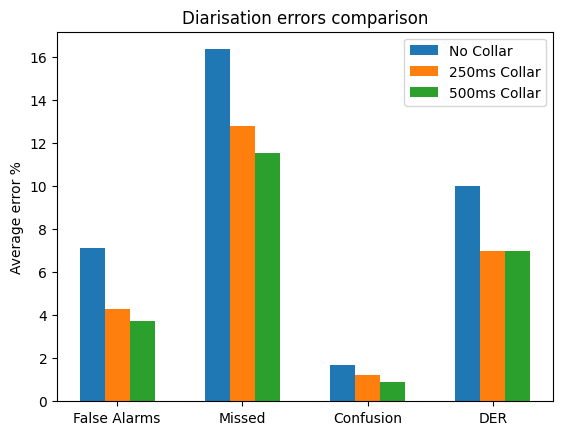

In [1]:
import matplotlib.pyplot as plt
import numpy as np

categories = ["False Alarms", "Missed", "Confusion", "DER"]
no_collar = [7.11, 16.35, 1.68, 10]
collar_250 = [4.27, 12.78, 1.24, 7]
collar_500 = [3.74, 11.51, 0.9, 7]

x = np.arange(len(categories))
width = 0.2

fig, ax = plt.subplots()
bars1 = ax.bar(x - width, no_collar, width, label="No Collar")
bars2 = ax.bar(x, collar_250, width, label="250ms Collar")
bars3 = ax.bar(x + width, collar_500, width, label="500ms Collar")

ax.set_ylabel("Average error %")
ax.set_title("Diarisation errors comparison")
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.savefig("pyannoteBench")
plt.show()

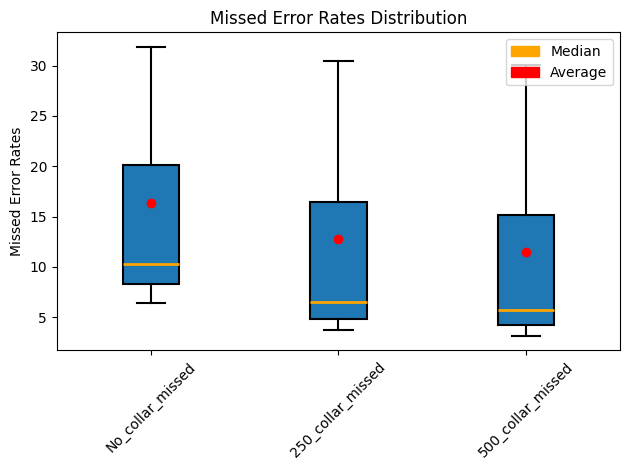

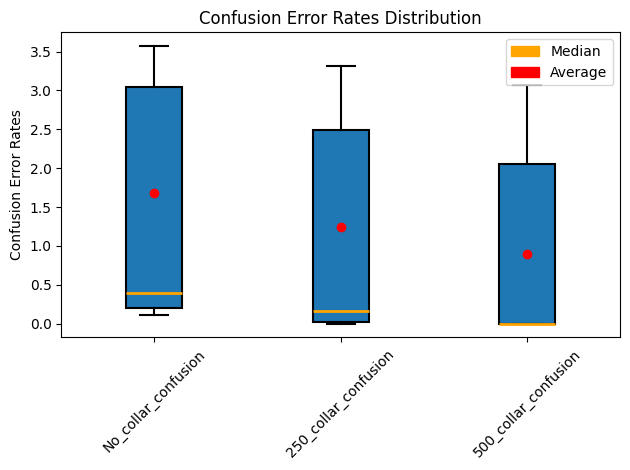

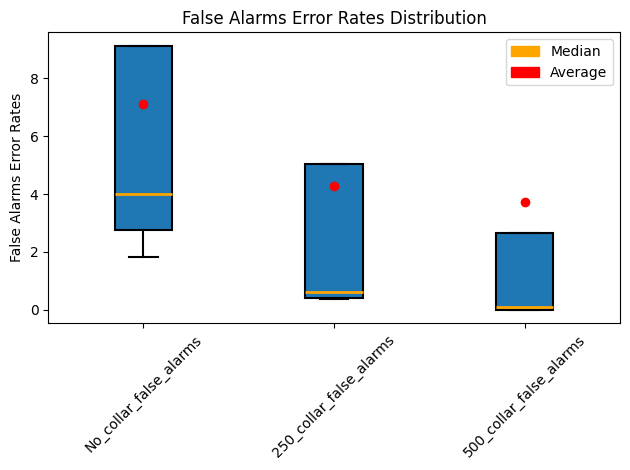

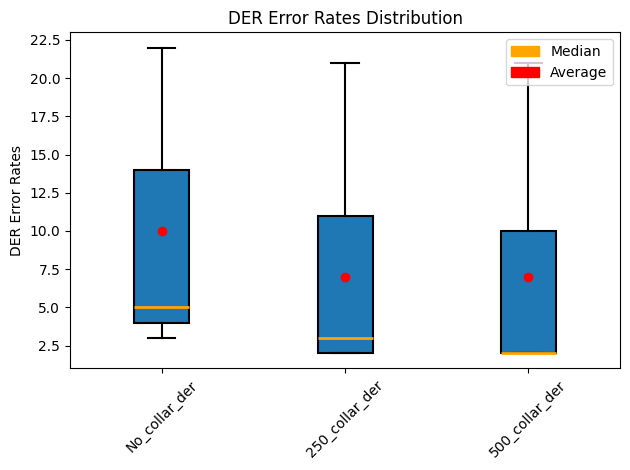

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Data for box plots
data = {
    "No_collar_false_alarms": {
        "average": 7.11,
        "stdev": 9.09,
        "median": 4.01,
        "max": 27.34,
        "min": 1.83,
        "q1": 2.75,
        "q3": 9.13,
    },
    "No_collar_missed": {
        "average": 16.35,
        "stdev": 10.07,
        "median": 10.31,
        "max": 31.86,
        "min": 6.45,
        "q1": 8.28,
        "q3": 20.13,
    },
    "No_collar_confusion": {
        "average": 1.68,
        "stdev": 1.74,
        "median": 0.39,
        "max": 3.57,
        "min": 0.11,
        "q1": 0.20,
        "q3": 3.05,
    },
    "No_collar_der": {
        "average": 10,
        "stdev": 7,
        "median": 5,
        "max": 22,
        "min": 3,
        "q1": 4,
        "q3": 14,
    },
    "250_collar_false_alarms": {
        "average": 4.27,
        "stdev": 9.74,
        "median": 0.63,
        "max": 26.35,
        "min": 0.37,
        "q1": 0.42,
        "q3": 5.02,
    },
    "250_collar_missed": {
        "average": 12.78,
        "stdev": 9.94,
        "median": 6.52,
        "max": 30.42,
        "min": 3.77,
        "q1": 4.83,
        "q3": 16.43,
    },
    "250_collar_confusion": {
        "average": 1.24,
        "stdev": 1.48,
        "median": 0.16,
        "max": 3.32,
        "min": 0.0,
        "q1": 0.02,
        "q3": 2.49,
    },
    "250_collar_der": {
        "average": 7,
        "stdev": 7,
        "median": 3,
        "max": 21,
        "min": 2,
        "q1": 2,
        "q3": 11,
    },
    "500_collar_false_alarms": {
        "average": 3.74,
        "stdev": 9.72,
        "median": 0.09,
        "max": 25.79,
        "min": 0.0,
        "q1": 0.0,
        "q3": 2.65,
    },
    "500_collar_missed": {
        "average": 11.51,
        "stdev": 9.63,
        "median": 5.73,
        "max": 30.03,
        "min": 3.17,
        "q1": 4.26,
        "q3": 15.13,
    },
    "500_collar_confusion": {
        "average": 0.9,
        "stdev": 1.22,
        "median": 0.0,
        "max": 3.07,
        "min": 0.0,
        "q1": 0.0,
        "q3": 2.06,
    },
    "500_collar_der": {
        "average": 7,
        "stdev": 7,
        "median": 2,
        "max": 21,
        "min": 2,
        "q1": 2,
        "q3": 10,
    },
}


def plot_boxplot(categories, title, ylabel, save_as):
    fig, ax = plt.subplots()

    positions = range(1, len(categories) + 1)
    box_plot_data = [
        [
            data[category]["min"],
            data[category]["q1"],
            data[category]["median"],
            data[category]["q3"],
            data[category]["max"],
        ]
        for category in categories
    ]

    bp = ax.boxplot(
        box_plot_data,
        vert=True,
        patch_artist=True,
        showmeans=False,
        showfliers=False,
        whiskerprops={"linewidth": 1.5},
        capprops={"linewidth": 1.5},
        boxprops={"linewidth": 1.5},
        medianprops={"linewidth": 2, "color": "orange"},
        positions=positions,
    )

    for i, category in enumerate(categories):
        ax.plot(i + 1, data[category]["average"], "ro")

    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xticks(positions)
    ax.set_xticklabels(categories, rotation=45)

    median_patch = mpatches.Patch(color="orange", label="Median")
    average_patch = mpatches.Patch(color="red", label="Average")
    ax.legend(handles=[median_patch, average_patch], loc="upper right")

    plt.tight_layout()
    plt.savefig(save_as)
    plt.show()


# Define categories for each plot
missed_categories = ["No_collar_missed", "250_collar_missed", "500_collar_missed"]
confusion_categories = [
    "No_collar_confusion",
    "250_collar_confusion",
    "500_collar_confusion",
]
false_alarm_categories = [
    "No_collar_false_alarms",
    "250_collar_false_alarms",
    "500_collar_false_alarms",
]
der_categories = ["No_collar_der", "250_collar_der", "500_collar_der"]

# Plot and save each boxplot
plot_boxplot(
    missed_categories,
    "Missed Error Rates Distribution",
    "Missed Error Rates",
    "missed_error_rates_box_plot.png",
)
plot_boxplot(
    confusion_categories,
    "Confusion Error Rates Distribution",
    "Confusion Error Rates",
    "confusion_error_rates_box_plot.png",
)
plot_boxplot(
    false_alarm_categories,
    "False Alarms Error Rates Distribution",
    "False Alarms Error Rates",
    "false_alarms_error_rates_box_plot.png",
)
plot_boxplot(
    der_categories,
    "DER Error Rates Distribution",
    "DER Error Rates",
    "der_error_rates_box_plot.png",
)

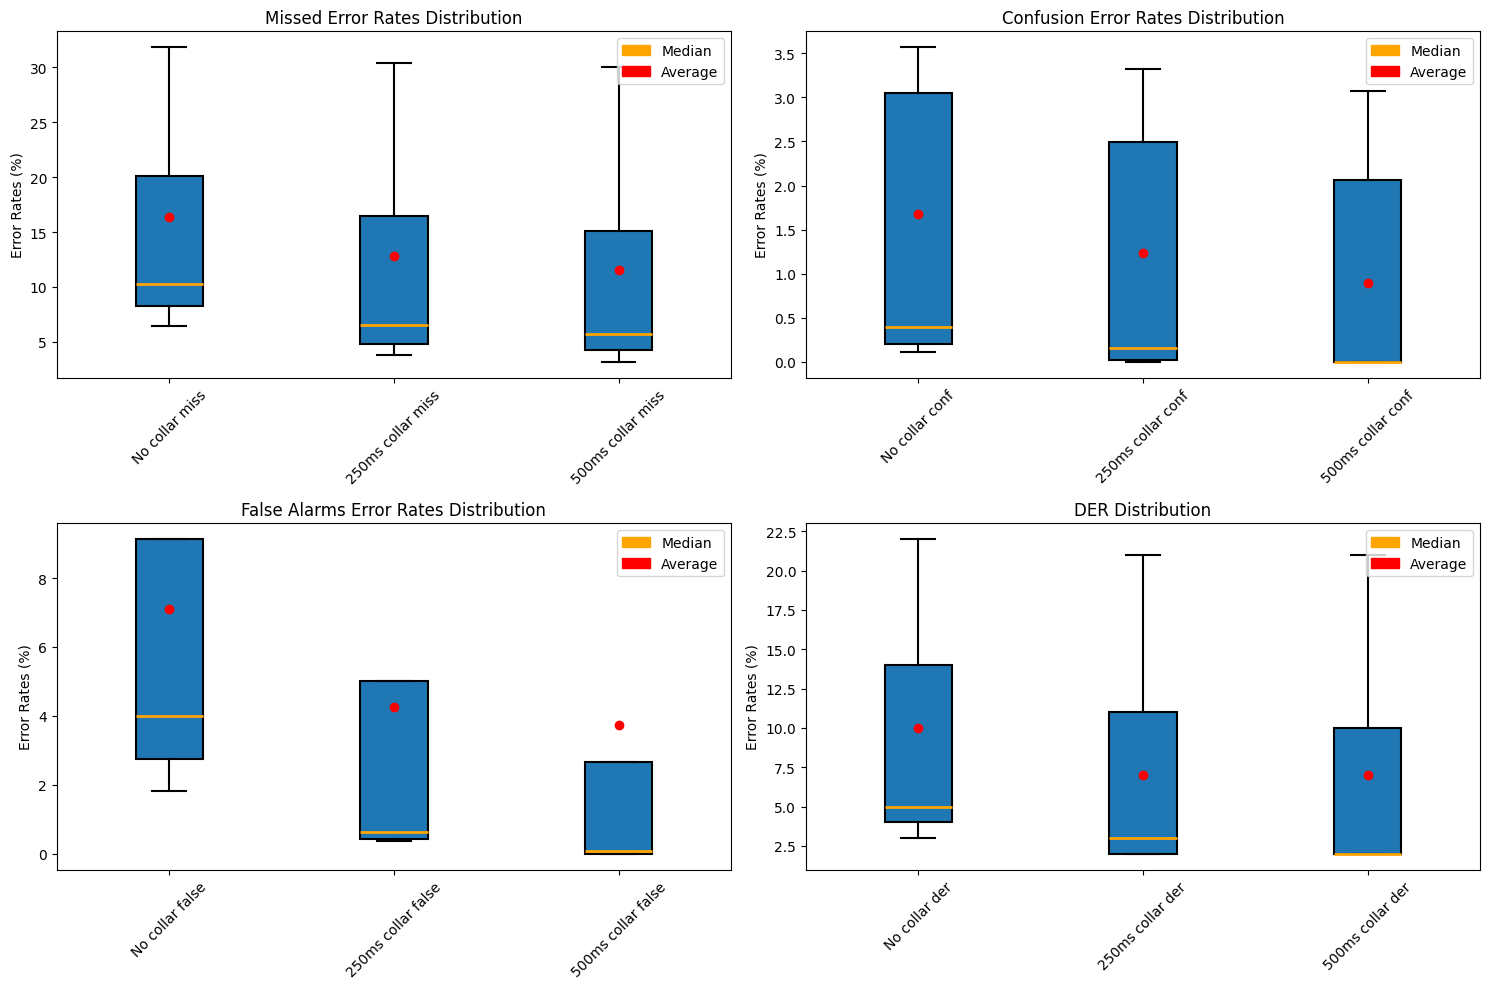

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Data for box plots
data = {
    "No collar false": {
        "average": 7.11,
        "stdev": 9.09,
        "median": 4.01,
        "max": 27.34,
        "min": 1.83,
        "q1": 2.75,
        "q3": 9.13,
    },
    "No collar miss": {
        "average": 16.35,
        "stdev": 10.07,
        "median": 10.31,
        "max": 31.86,
        "min": 6.45,
        "q1": 8.28,
        "q3": 20.13,
    },
    "No collar conf": {
        "average": 1.68,
        "stdev": 1.74,
        "median": 0.39,
        "max": 3.57,
        "min": 0.11,
        "q1": 0.20,
        "q3": 3.05,
    },
    "No collar der": {
        "average": 10,
        "stdev": 7,
        "median": 5,
        "max": 22,
        "min": 3,
        "q1": 4,
        "q3": 14,
    },
    "250ms collar false": {
        "average": 4.27,
        "stdev": 9.74,
        "median": 0.63,
        "max": 26.35,
        "min": 0.37,
        "q1": 0.42,
        "q3": 5.02,
    },
    "250ms collar miss": {
        "average": 12.78,
        "stdev": 9.94,
        "median": 6.52,
        "max": 30.42,
        "min": 3.77,
        "q1": 4.83,
        "q3": 16.43,
    },
    "250ms collar conf": {
        "average": 1.24,
        "stdev": 1.48,
        "median": 0.16,
        "max": 3.32,
        "min": 0.0,
        "q1": 0.02,
        "q3": 2.49,
    },
    "250ms collar der": {
        "average": 7,
        "stdev": 7,
        "median": 3,
        "max": 21,
        "min": 2,
        "q1": 2,
        "q3": 11,
    },
    "500ms collar false": {
        "average": 3.74,
        "stdev": 9.72,
        "median": 0.09,
        "max": 25.79,
        "min": 0.0,
        "q1": 0.0,
        "q3": 2.65,
    },
    "500ms collar miss": {
        "average": 11.51,
        "stdev": 9.63,
        "median": 5.73,
        "max": 30.03,
        "min": 3.17,
        "q1": 4.26,
        "q3": 15.13,
    },
    "500ms collar conf": {
        "average": 0.9,
        "stdev": 1.22,
        "median": 0.0,
        "max": 3.07,
        "min": 0.0,
        "q1": 0.0,
        "q3": 2.06,
    },
    "500ms collar der": {
        "average": 7,
        "stdev": 7,
        "median": 2,
        "max": 21,
        "min": 2,
        "q1": 2,
        "q3": 10,
    },
}


def plot_boxplot(ax, categories, title, ylabel):
    positions = range(1, len(categories) + 1)
    box_plot_data = [
        [
            data[category]["min"],
            data[category]["q1"],
            data[category]["median"],
            data[category]["q3"],
            data[category]["max"],
        ]
        for category in categories
    ]

    bp = ax.boxplot(
        box_plot_data,
        vert=True,
        patch_artist=True,
        showmeans=False,
        showfliers=False,
        whiskerprops={"linewidth": 1.5},
        capprops={"linewidth": 1.5},
        boxprops={"linewidth": 1.5},
        medianprops={"linewidth": 2, "color": "orange"},
        positions=positions,
    )

    for i, category in enumerate(categories):
        ax.plot(i + 1, data[category]["average"], "ro")

    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xticks(positions)
    ax.set_xticklabels(categories, rotation=45)

    median_patch = mpatches.Patch(color="orange", label="Median")
    average_patch = mpatches.Patch(color="red", label="Average")
    ax.legend(handles=[median_patch, average_patch], loc="upper right")


fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Define categories for each subplot
missed_categories = ["No collar miss", "250ms collar miss", "500ms collar miss"]
confusion_categories = [
    "No collar conf",
    "250ms collar conf",
    "500ms collar conf",
]
false_alarm_categories = [
    "No collar false",
    "250ms collar false",
    "500ms collar false",
]
der_categories = ["No collar der", "250ms collar der", "500ms collar der"]

# Plot each subplot
plot_boxplot(
    axs[0, 0],
    missed_categories,
    "Missed Error Rates Distribution",
    "Error Rates (%)",
)
plot_boxplot(
    axs[0, 1],
    confusion_categories,
    "Confusion Error Rates Distribution",
    "Error Rates (%)",
)
plot_boxplot(
    axs[1, 0],
    false_alarm_categories,
    "False Alarms Error Rates Distribution",
    "Error Rates (%)",
)
plot_boxplot(axs[1, 1], der_categories, "DER Distribution", "Error Rates (%)")

plt.tight_layout()
plt.savefig("error_rates_box_plots.png")
plt.show()

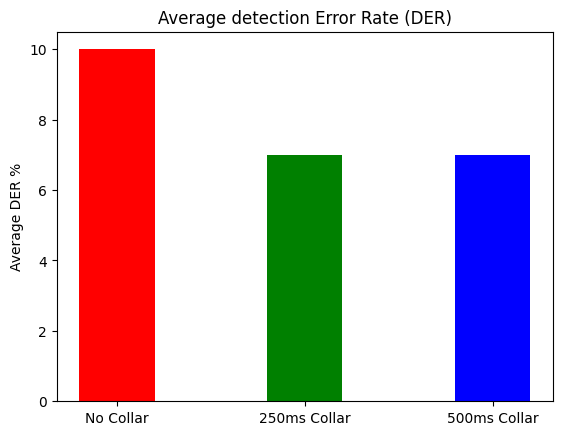

In [4]:
import matplotlib.pyplot as plt
import numpy as np

categories = ["No Collar", "250ms Collar", "500ms Collar"]
der_values = [10, 7, 7]

x = np.arange(len(categories))

width = 0.4

fig, ax = plt.subplots()
bars = ax.bar(x, der_values, width, color=["red", "green", "blue"])

ax.set_ylabel("Average DER %")
ax.set_title("Average detection Error Rate (DER)")
ax.set_xticks(x)
ax.set_xticklabels(categories)

plt.show()

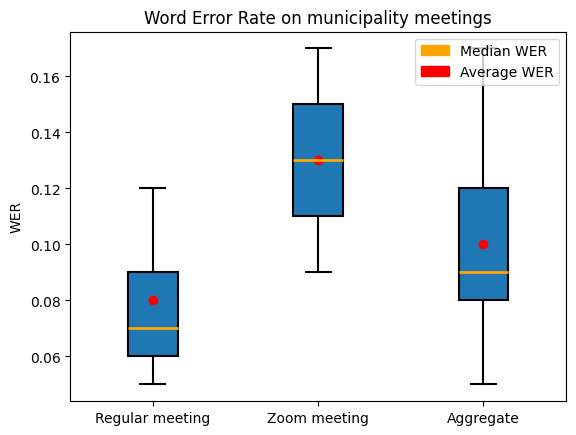

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Original WER data
wer_data_whisper = {
    "Average WER": 0.08,
    "WER Stdev": 0.03,
    "WER Variance": 0.0,
    "WER Median": 0.07,
    "WER Max": 0.12,
    "WER Min": 0.05,
}

# Additional WER data
wer_data_covid_whisper = {
    "Average WER": 0.13,
    "WER Stdev": 0.06,
    "WER Variance": 0.0,
    "WER Median": 0.13,
    "WER Max": 0.17,
    "WER Min": 0.09,
}

wer_data_total_whisper = {
    "Average WER": 0.1,
    "WER Stdev": 0.04,
    "WER Variance": 0.0,
    "WER Median": 0.09,
    "WER Max": 0.17,
    "WER Min": 0.05,
}

# Data for box plots
q1_whisper = 0.06
q3_whisper = 0.09
box_plot_data_whisper = [
    wer_data_whisper["WER Min"],
    q1_whisper,
    wer_data_whisper["WER Median"],
    q3_whisper,
    wer_data_whisper["WER Max"],
]

q1_covid_whisper = 0.11
q3_covid_whisper = 0.15
box_plot_data_covid_whisper = [
    wer_data_covid_whisper["WER Min"],
    q1_covid_whisper,
    wer_data_covid_whisper["WER Median"],
    q3_covid_whisper,
    wer_data_covid_whisper["WER Max"],
]

q1_total_whisper = 0.08
q3_total_whisper = 0.12
box_plot_data_total_whisper = [
    wer_data_total_whisper["WER Min"],
    q1_total_whisper,
    wer_data_total_whisper["WER Median"],
    q3_total_whisper,
    wer_data_total_whisper["WER Max"],
]

# Plotting the box plots
fig, ax = plt.subplots()

box_plot_data = [
    box_plot_data_whisper,
    box_plot_data_covid_whisper,
    box_plot_data_total_whisper,
]
ax.boxplot(
    box_plot_data,
    vert=True,
    patch_artist=True,
    showmeans=False,
    showfliers=False,
    whiskerprops={"linewidth": 1.5},
    capprops={"linewidth": 1.5},
    boxprops={"linewidth": 1.5},
    medianprops={"linewidth": 2, "color": "orange"},
)

ax.set_title("Word Error Rate on municipality meetings")
ax.set_ylabel("WER")
ax.set_xticklabels(["Regular meeting", "Zoom meeting", "Aggregate"])

# Adding average WER points
average_wers = [
    wer_data_whisper["Average WER"],
    wer_data_covid_whisper["Average WER"],
    wer_data_total_whisper["Average WER"],
]

for i, avg_wer in enumerate(average_wers, start=1):
    ax.plot(i, avg_wer, "ro")

# Adding legend
median_patch = mpatches.Patch(color="orange", label="Median WER")
average_patch = mpatches.Patch(color="red", label="Average WER")
plt.legend(handles=[median_patch, average_patch], loc="upper right")

plt.savefig("whisperBench")
plt.show()

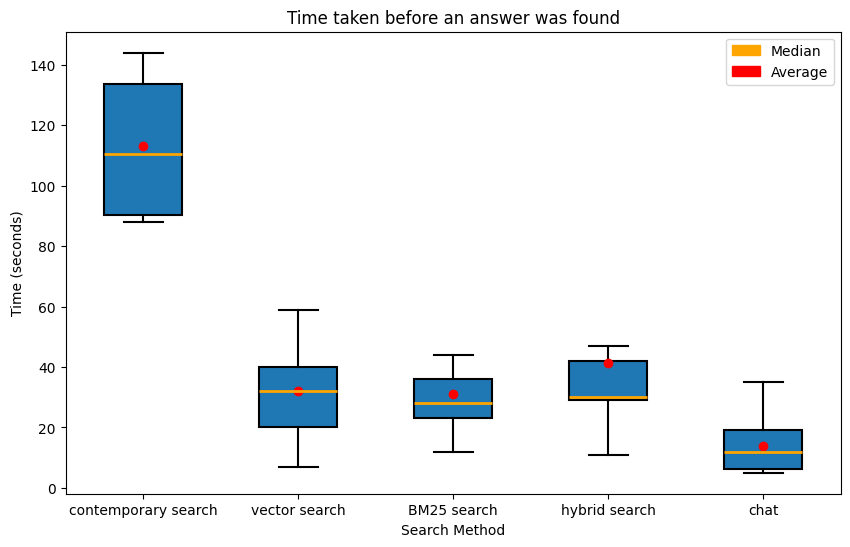

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Search times data for each individual
data = {
    "LOTTE": {"vector search": 72, "BM25 search": 12, "hybrid search": 68, "chat": 8},
    "RENSKE": {"vector search": 7, "BM25 search": 61, "hybrid search": 129, "chat": 5},
    "VINCENT": {"vector search": 15, "BM25 search": 60, "hybrid search": 33, "chat": 6},
    "PIM": {"vector search": 40, "BM25 search": 27, "hybrid search": 30, "chat": 21},
    "PEPIJN": {
        "contemporary search": 88,
        "vector search": 12,
        "BM25 search": 36,
        "hybrid search": 29,
        "chat": 7,
    },
    "JURRIAAN": {
        "contemporary search": 144,
        "vector search": 41,
        "BM25 search": 23,
        "hybrid search": 30,
        "chat": 35,
    },
    "JOCHEM": {"vector search": 20, "BM25 search": 13, "hybrid search": 26, "chat": 6},
    "DEVRIM": {
        "contemporary search": 130,
        "vector search": 34,
        "BM25 search": 24,
        "hybrid search": 11,
    },
    "RAVI": {"vector search": 21, "BM25 search": 18, "hybrid search": 25, "chat": 16},
    "DAAN": {"vector search": 32, "BM25 search": 28, "hybrid search": 47},
    "NIELS": {
        "contemporary search": 91,
        "vector search": 26,
        "BM25 search": 44,
        "hybrid search": 42,
        "chat": 16,
    },
    "JORDY": {"vector search": 38, "BM25 search": 30, "hybrid search": 36},
    "YOOJIN": {
        "vector search": 59,
        "BM25 search": 28,
        "hybrid search": 30,
        "chat": 20,
    },
}

# Aggregate the data for each search method
search_methods = [
    "contemporary search",
    "vector search",
    "BM25 search",
    "hybrid search",
    "chat",
]
aggregated_data = {method: [] for method in search_methods}

for person in data:
    for method in data[person]:
        if isinstance(data[person][method], int):
            aggregated_data[method].append(data[person][method])

average_data = {
    method: np.mean(times) if times else None
    for method, times in aggregated_data.items()
}

# Prepare data for box plot
box_plot_data = [times for method, times in aggregated_data.items() if times]
average_values = [
    average_data[method] for method in search_methods if aggregated_data[method]
]

# Plotting the box plot
fig, ax = plt.subplots(figsize=(10, 6))
box = ax.boxplot(
    box_plot_data,
    vert=True,
    patch_artist=True,
    showmeans=False,
    showfliers=False,
    whiskerprops={"linewidth": 1.5},
    capprops={"linewidth": 1.5},
    boxprops={"linewidth": 1.5},
    medianprops={"linewidth": 2, "color": "orange"},
)

# Adding average points
for i, avg in enumerate(average_values, start=1):
    ax.plot(i, avg, "ro")

# Adding title and labels
ax.set_title("Time taken before an answer was found")
ax.set_xlabel("Search Method")
ax.set_ylabel("Time (seconds)")
ax.set_xticklabels([method for method in search_methods if aggregated_data[method]])

# Adding legend
median_patch = mpatches.Patch(color="orange", label="Median")
average_patch = mpatches.Patch(color="red", label="Average")
plt.legend(handles=[median_patch, average_patch], loc="upper right")

# Save and show plot
plt.savefig("search_methods_box_plot.png")
plt.show()

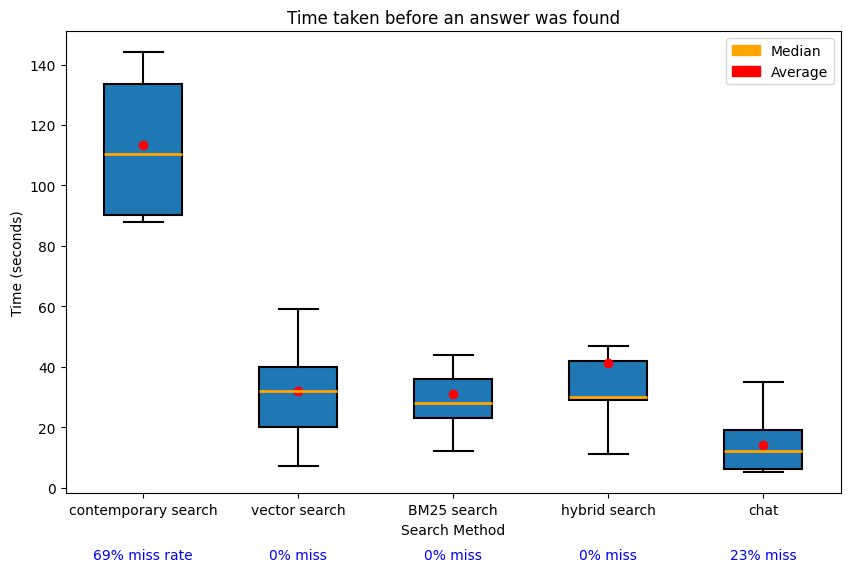

In [15]:
# Plotting the box plot
fig, ax = plt.subplots(figsize=(10, 6))
box = ax.boxplot(
    box_plot_data,
    vert=True,
    patch_artist=True,
    showmeans=False,
    showfliers=False,
    whiskerprops={"linewidth": 1.5},
    capprops={"linewidth": 1.5},
    boxprops={"linewidth": 1.5},
    medianprops={"linewidth": 2, "color": "orange"},
)

# Adding average points
for i, avg in enumerate(average_values, start=1):
    ax.plot(i, avg, "ro")

# Adding title and labels
ax.set_title("Time taken before an answer was found")
ax.set_xlabel("Search Method")
ax.set_ylabel("Time (seconds)")
ax.set_xticklabels([method for method in search_methods if aggregated_data[method]])

# Adding legend
median_patch = mpatches.Patch(color="orange", label="Median")
average_patch = mpatches.Patch(color="red", label="Average")
plt.legend(handles=[median_patch, average_patch], loc="upper right")

# Adding miss rate text
miss_rates = {
    "contemporary search": "69% miss rate",
    "vector search": "0% miss",
    "BM25 search": "0% miss",
    "hybrid search": "0% miss",
    "chat": "23% miss",
}

for i, method in enumerate(search_methods, start=1):
    if method in miss_rates:
        ax.text(
            i, -20, miss_rates[method], ha="center", va="top", fontsize=10, color="blue"
        )

# Save and show plot
plt.savefig("search_methods_box_plot.png")
plt.show()

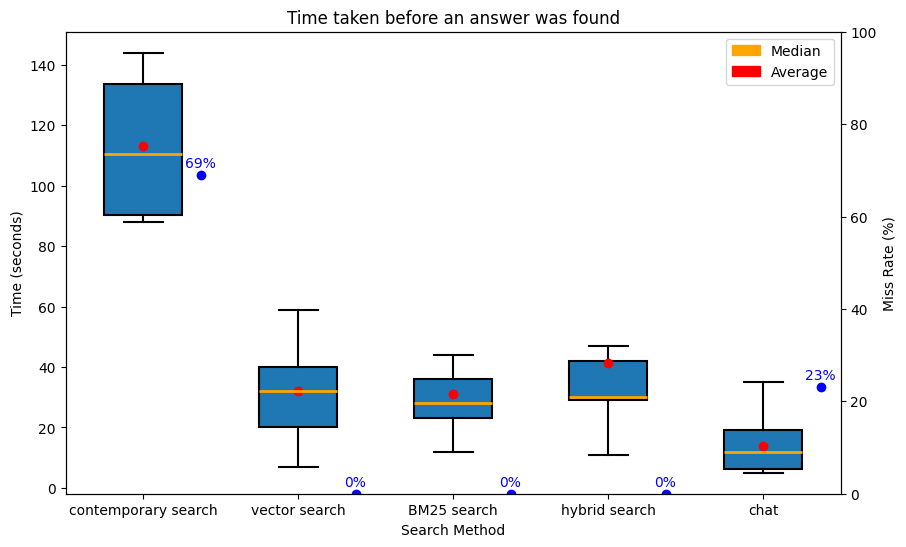

In [30]:
# Plotting the box plot
fig, ax = plt.subplots(figsize=(10, 6))
box = ax.boxplot(
    box_plot_data,
    vert=True,
    patch_artist=True,
    showmeans=False,
    showfliers=False,
    whiskerprops={"linewidth": 1.5},
    capprops={"linewidth": 1.5},
    boxprops={"linewidth": 1.5},
    medianprops={"linewidth": 2, "color": "orange"},
)

# Adding average points
for i, avg in enumerate(average_values, start=1):
    ax.plot(i, avg, "ro")

# Adding title and labels
ax.set_title("Time taken before an answer was found")
ax.set_xlabel("Search Method")
ax.set_ylabel("Time (seconds)")
ax.set_xticklabels([method for method in search_methods if aggregated_data[method]])

# Adding legend
median_patch = mpatches.Patch(color="orange", label="Median")
average_patch = mpatches.Patch(color="red", label="Average")
plt.legend(handles=[median_patch, average_patch], loc="upper right")

ax2 = ax.twinx()
ax2.set_ylabel("Miss Rate (%)")
ax2.set_ylim(0, 100)

miss_rates = {
    "contemporary search": 69,
    "vector search": 0,
    "BM25 search": 0,
    "hybrid search": 0,
    "chat": 23,
}

# Plotting miss rate
offset = 0.37
for i, method in enumerate(search_methods, start=1):
    if method in miss_rates:
        ax2.plot(i + offset, miss_rates[method], "bo")
        ax2.text(
            i + offset,
            miss_rates[method] + 1,
            f"{miss_rates[method]}%",
            ha="center",
            va="bottom",
            fontsize=10,
            color="blue",
        )


# # Adding miss rate text
# miss_rates = {
#     "contemporary search": "69% miss rate",
#     "vector search": "0% miss",
#     "BM25 search": "0% miss",
#     "hybrid search": "0% miss",
#     "chat": "23% miss",
# }

# for i, method in enumerate(search_methods, start=1):
#     if method in miss_rates:
#         ax.text(
#             i, -20, miss_rates[method], ha="center", va="top", fontsize=10, color="blue"
#         )

# Save and show plot
plt.savefig("search_methods_box_plot.png")
plt.show()